In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [19]:
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('train.csv')
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [3]:
df = df.drop('row_id', axis= 1)

In [12]:
df.index = pd.to_datetime(df.index)


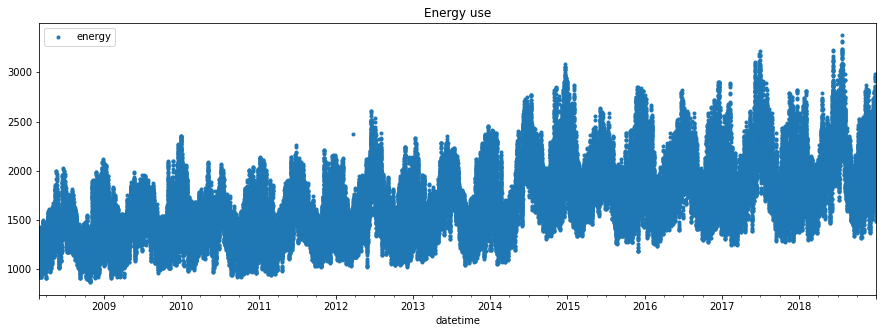

In [13]:
# Visualizing the power use over time
df.plot(style= '.', figsize = (15,5), title= 'Energy use')
plt.show()

# Train Test Split

In [15]:
data = pd.read_csv('test.csv')
data.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [16]:
train = df.loc[df.index <'2016-01-01']
test = df.loc[df.index >= '2016-01-01']

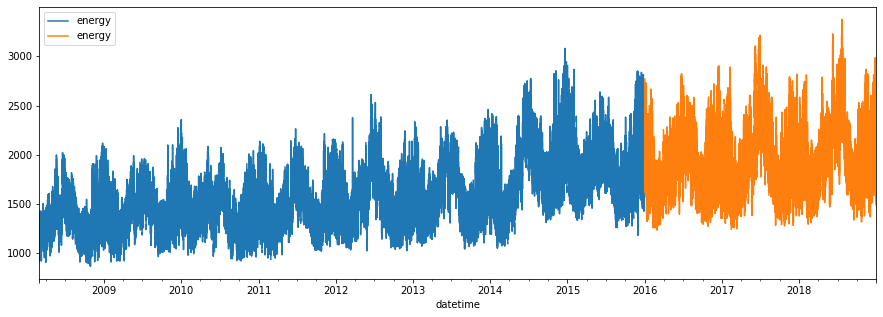

In [17]:
fid, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label= 'Training set')
test.plot(ax=ax, label= 'Testing set')
plt.show()

# Features Creation

In [18]:
def create_feature(df):
    """
    Create Time series features based on the time series index
    """

    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    
    return df

df = create_feature(df)

In [68]:
df

,energy,hour,dayofweek,quarter,month,year,dayofyear,prediction
datetime,,,,,,,,
2008-03-01 00:00:00,1259.985563,0,5,1,3,2008,61,NaN
2008-03-01 01:00:00,1095.541500,1,5,1,3,2008,61,NaN
2008-03-01 02:00:00,1056.247500,2,5,1,3,2008,61,NaN
2008-03-01 03:00:00,1034.742000,3,5,1,3,2008,61,NaN
2008-03-01 04:00:00,1026.334500,4,5,1,3,2008,61,NaN
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2528.446800,19,0,4,12,2018,365,2348.965332
2018-12-31 20:00:00,2461.883600,20,0,4,12,2018,365,2284.882324
2018-12-31 21:00:00,2365.994400,21,0,4,12,2018,365,2182.329346


# Create Model

In [20]:
df.columns

Index(['energy', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'], dtype='object')

In [22]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'energy'

In [24]:
train = create_feature(train)
test = create_feature(test)

x_train = train[FEATURES]
y_train = train[TARGET]

x_teta = test[FEATURES]
y_test = test[TARGET]

C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\2427107174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\2427107174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\2427107174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [27]:
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

In [34]:
reg = xgb.XGBRegressor(n_estimators = 3500, early_stopping_rounds=50,learning_rate = 0.01)
reg.fit(x_train, y_train, 
       eval_set= [(x_train, y_train), (x_teta, y_test)],
       verbose = 100)

[0]	validation_0-rmse:1615.66472	validation_1-rmse:1980.79755
[100]	validation_0-rmse:611.86631	validation_1-rmse:796.44327
[200]	validation_0-rmse:261.73012	validation_1-rmse:396.52302
[300]	validation_0-rmse:154.69274	validation_1-rmse:279.58644
[400]	validation_0-rmse:126.66492	validation_1-rmse:250.11207
[500]	validation_0-rmse:117.45989	validation_1-rmse:241.60945
[600]	validation_0-rmse:112.62365	validation_1-rmse:238.63956
[700]	validation_0-rmse:108.55032	validation_1-rmse:238.07885
[800]	validation_0-rmse:105.73779	validation_1-rmse:237.56024
[871]	validation_0-rmse:104.24646	validation_1-rmse:237.56404


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Feature Importance

In [35]:
reg.feature_importances_

array([0.17785145, 0.08602528, 0.07276572, 0.20083722, 0.363184  ,
       0.09933622], dtype=float32)

In [36]:
fi = pd.DataFrame(data= reg.feature_importances_,
            index = reg.feature_names_in_,
            columns= ['importance'])

In [37]:
fi

,importance
hour,0.177851
dayofweek,0.086025
quarter,0.072766
month,0.200837
year,0.363184
dayofyear,0.099336


<AxesSubplot:title={'center':'Feature Importance'}>

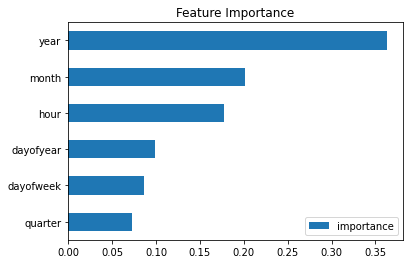

In [38]:
fi.sort_values('importance').plot(kind= 'barh', title = 'Feature Importance')

# Forecast on Test set

In [39]:
test['prediction'] = reg.predict(x_teta)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\3409104606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_teta)


In [42]:
df = df.merge(test[['prediction']], how = 'left', left_index= True, right_index = True)

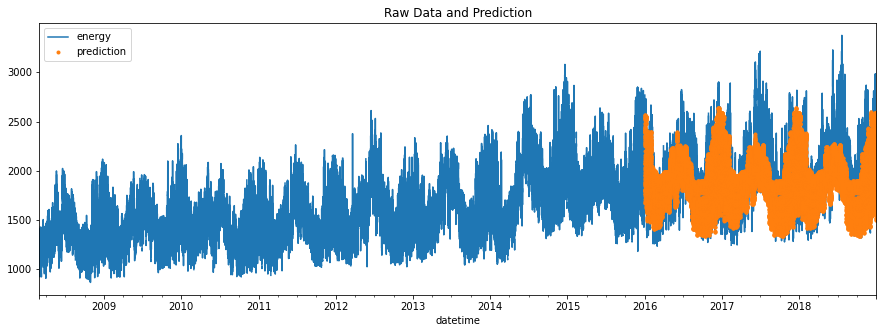

In [44]:
ax= df[['energy']].plot(figsize= (15,5))
df['prediction'].plot(ax= ax, style ='.')
ax.set_title('Raw Data and Prediction')
plt.legend()
plt.show()

In [46]:
test['energy']=test['energy'].fillna(test['energy'].mean())

score = np.sqrt(mean_squared_error(test['energy'], test['prediction']))
print(f'RMSE score on test: {score:0.4}')

RMSE score on test: 237.5


In [49]:
data.drop('row_id', axis=1, inplace= True)

In [67]:


data1 = pd.read_csv('test.csv')
data1.drop('row_id', axis=1, inplace=True)

In [74]:
data1 = data1.set_index('datetime')

In [77]:
data1.index = pd.to_datetime(data1.index)
data1 = create_feature(data1)

In [78]:
data1.head()

,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,
2019-01-01 00:00:00,0,1,1,1,2019,1
2019-01-01 01:00:00,1,1,1,1,2019,1
2019-01-01 02:00:00,2,1,1,1,2019,1
2019-01-01 03:00:00,3,1,1,1,2019,1
2019-01-01 04:00:00,4,1,1,1,2019,1


# Predction on the actual dates

In [79]:
data1['prediction'] = reg.predict(data1[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']])
data1.head()

,hour,dayofweek,quarter,month,year,dayofyear,prediction
datetime,,,,,,,
2019-01-01 00:00:00,0,1,1,1,2019,1,2005.426025
2019-01-01 01:00:00,1,1,1,1,2019,1,1925.096802
2019-01-01 02:00:00,2,1,1,1,2019,1,1840.802979
2019-01-01 03:00:00,3,1,1,1,2019,1,1776.070068
2019-01-01 04:00:00,4,1,1,1,2019,1,1758.567383


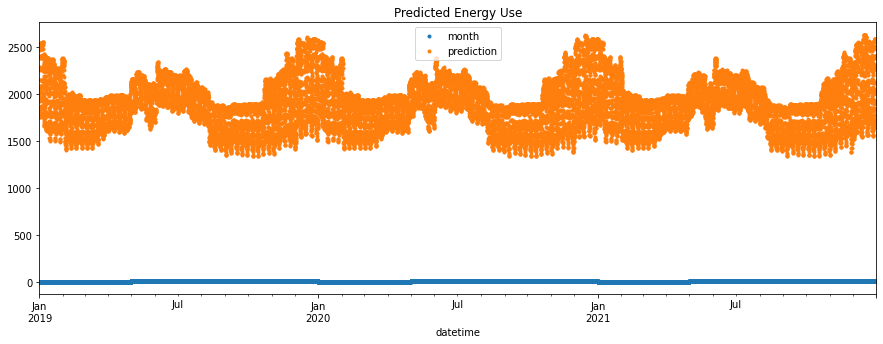

In [83]:
# Predicted energy use over time
data2 = data1[['month','prediction']]


data2.plot(style='.', figsize=(15,5), title = 'Predicted Energy Use')
plt.show()